隐式差分格式

In [9]:
import numpy as np
import scipy as sp
from scipy.linalg import solve_banded 

class HeatEquation:    
    def __init__(self, kappa, X, T,initialConstion = lambda x:4.0*x*(1.0-x), boundaryConditionL = lambda x: 0, boundaryCondtionR = lambda x:0):
        self.kappa = kappa
        self.ic = initialConstion
        self.bcl = boundaryConditionL
        self.bcr = boundaryCondtionR
        self.X = X
        self.T = T


class ImplicitEulerSchemeWithScipy:    
    def __init__(self, M, N, equation):
        self.eq = equation
        self.dt = self.eq.T / M
        self.dx = self.eq.X / N
        self.U = np.zeros((N+1, M+1))
        self.xArray = np.linspace(0,self.eq.X,N+1)
        self.U[:,0] = list(map(self.eq.ic, self.xArray))
        self.rho = self.eq.kappa * self.dt / self.dx / self.dx
        self.M = M
        self.N = N

    def roll_back(self):
        for k in range(0, self.M):
            udiag = - np.ones(self.N-1) * self.rho
            ldiag =  - np.ones(self.N-1) * self.rho
            cdiag =  np.ones(self.N-1) * (1.0 + 2. * self.rho)

            mat = np.zeros((3,self.N-1))
            mat[0,:] = udiag
            mat[1,:] = cdiag
            mat[2,:] = ldiag
            rhs = self.U[1:self.N,k]
            x = solve_banded((1,1), mat, rhs)
            self.U[1:self.N, k+1] = x
            self.U[0][k+1] = self.eq.bcl(self.xArray[0])
            self.U[self.N][k+1] = self.eq.bcr(self.xArray[-1])

    def mesh_grids(self):
        tArray = np.linspace(0, self.eq.T, M+1)
        tGrids, xGrids = np.meshgrid(tArray, self.xArray)
        return tGrids, xGrids

In [10]:
N = 500  # x方向网格数
M = 500  # t方向网格数

T = 1.0
X = 1.0

ht = HeatEquation(1.,X, T)
scheme = ImplicitEulerSchemeWithScipy(M,N, ht)
scheme.roll_back()
scheme.U

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.98400000e-03, 7.28427938e-03, 6.92659792e-03, ...,
        3.83981494e-07, 3.76548744e-07, 3.69259870e-07],
       [1.59360000e-02, 1.45671593e-02, 1.38524805e-02, ...,
        7.67947828e-07, 7.53082622e-07, 7.38505162e-07],
       ...,
       [1.59360000e-02, 1.45671593e-02, 1.38524805e-02, ...,
        7.67947828e-07, 7.53082622e-07, 7.38505162e-07],
       [7.98400000e-03, 7.28427938e-03, 6.92659792e-03, ...,
        3.83981494e-07, 3.76548744e-07, 3.69259870e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Font 'default' does not have a glyph for '\u70ed' [U+70ed], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f20' [U+4f20], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5bfc' [U+5bfc], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u65b9' [U+65b9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7a0b' [U+7a0b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u70ed' [U+70ed], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f20' [U+4f20], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5bfc' [U+5bfc], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u65b9' [U+65b9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7a0b' [U+7a0b], substituting with a dummy symbol.


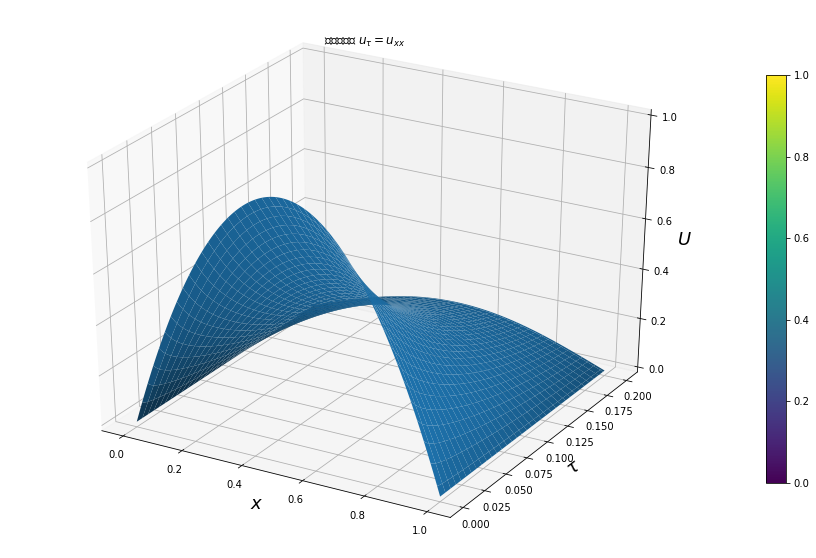

In [11]:
from matplotlib import pylab



tGrids, xGrids = scheme.mesh_grids()
fig= pylab.figure(figsize = (16,10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
cutoff = int(0.2 / scheme.dt) + 1
surface = ax.plot_surface(xGrids[:,:cutoff], tGrids[:,:cutoff], scheme.U[:,:cutoff])
ax.set_xlabel("$x$", fontdict={"size":18})
ax.set_ylabel(r"$\tau$", fontdict={"size":18})
ax.set_zlabel(r"$U$", fontdict={"size":18})
ax.set_title(u"热传导方程 $u_\\tau = u_{xx}$" )
fig.colorbar(surface,shrink=0.75)